In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pth = mobipy.mobius2_path() + 'models/'
data_pth = pth + 'example_data/simplyq_simple.dat'
model_pth = pth + 'simplyq_model.txt'

ds = mobipy.Data_Set.load_from_file(data_pth)

ds.reshape(
    indexes = {
        'Landscape units' : ['Forest', 'Peat'],
        'Subcatchment' : ['Coull', 'Next'],
    },
    connections = {
        'Downstream' : '[ r["Coull"] -> r["Next"] -> out ]'
    }
)

app = mobipy.Model_Application.build_from_model_and_data_file(model_pth, ds)

for s in app.sc.indexes() :
    app.lu_prop[s, 'Forest'] = 0.8
    app.lu_prop[s, 'Peat'] = 0.2
app['SimplyQ land'].tc_s['Peat'] = 10
app.a_catch['Next'] = 0.4*app.a_catch['Coull']

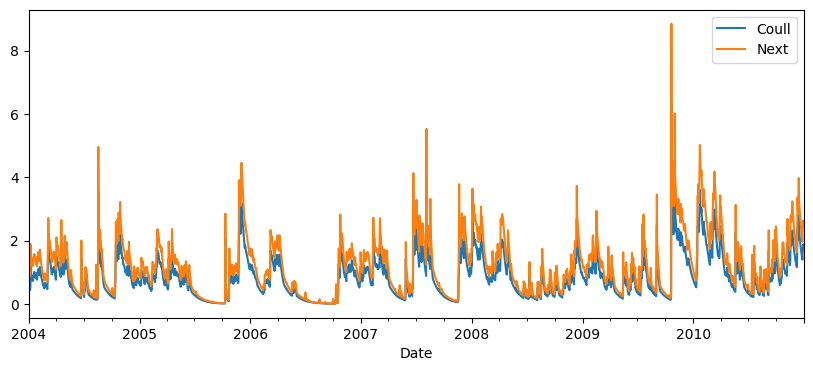

In [3]:
app.run()
ax = app.var('Reach flow flux')['Coull'].plot(figsize=(10, 4), label='Coull')
app.var('Reach flow flux')['Next'].plot(ax=ax, label='Next')
ax.legend()